## The data set is from "Online Shoppers Purchasing Intention Dataset Data Set" https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
## The goal is to develop Machine Learning Models to present a complete analysis for online shopping behavior data set.

## Description of data set:
### The data set is "online_shoppers_intention.csv". This data set represents skewed data, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
```
a. The dataset consists of 10 numerical and 8 categorical attributes.
b. The 'Revenue' attribute can be used as the class label.
c. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
d. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
e. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
f. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
g. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page and it represents the percentage that the page was seen in the last session. 
h. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
i. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
j. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.
```

In [2]:
## Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
#!pwd
## Change to working directory
#import os
#os.chdir('/content/drive/MyDrive/ColabNbs/personal_project/')

In [3]:
#Load the libraries
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
df = pd.read_csv("data/online_shoppers_intention.csv")
print(f'data has size = {df.shape}')
df.head()

data has size = (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
#Check missing data
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# Checking the type of data
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
df[['SpecialDay','Weekend','Revenue']] = df[['SpecialDay','Weekend','Revenue']].astype(int)


#Select non numerical value
non_numeric_columns = df.select_dtypes(include=[np.object])
# Loop through the non-numeric columns
for col in range(non_numeric_columns.shape[1]):
    # Print the counts of each unique value in the current column
    print(non_numeric_columns.iloc[:,col].value_counts())

df.dtypes

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                   int32
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int32
Revenue                      int32
dtype: object

In [9]:
#Check missing data
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
# Checking the type of data
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                   int32
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int32
Revenue                      int32
dtype: object

In [11]:
df[['SpecialDay','Weekend','Revenue']] = df[['SpecialDay','Weekend','Revenue']].astype(int)

#Select non numerical value
non_numeric_columns = df.select_dtypes(include=[np.object])
# Loop through the non-numeric columns
for col in range(non_numeric_columns.shape[1]):
    # Print the counts of each unique value in the current column
    print(non_numeric_columns.iloc[:,col].value_counts())

df.dtypes

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                   int32
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int32
Revenue                      int32
dtype: object

### Task 1: Build a predictive classification model (ensuring optimal features and classifier). Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March.

We are going to fit a best Linear and non-linear classifier and explain the optimal features set and dimensions. Linear classifier aids explanaibility while non-linear classifier may enhance classification performance.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [14]:
# Do one-hot encoded for categorical data
# List the categorical features. 
categorical_columns = ['SpecialDay','OperatingSystems','Browser','TrafficType', 'VisitorType']
# One-hot encode the categorical features with the get_dummies() function for Pandas DataFrames
ohe = pd.get_dummies(df[categorical_columns].astype(str))
ohe.head()

,SpecialDay_0,SpecialDay_1,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [15]:
df_tsk1 = df.drop(categorical_columns, axis=1) 
df_tsk1 = pd.concat([df_tsk1, ohe], axis=1)
df_tsk1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,Feb,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,Feb,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,Feb,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,Feb,...,0,1,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,Feb,...,0,1,0,0,0,0,0,0,0,1


In [16]:
# Split train and test data
# for train data
options = ['June','Jul','Aug','Sep','Oct','Nov','Dec']  
# selecting rows based on condition
X_train = df_tsk1[df_tsk1['Month'].isin(options)]
y_train = X_train['Revenue']
X_train = X_train.drop(['Month','Region'], axis=1) 

# for test data
options = ['Feb','Mar']  
# selecting rows based on condition
X_test = df_tsk1[df_tsk1['Month'].isin(options)]
X_test = X_test.drop(['Month','Region'], axis=1) 
y_test = X_test['Revenue']

In [17]:
# Compute the fraction of positive values in the train and target
print(f'Percentage of purchases in training = {(np.sum(y_train)*100)/len(y_train)}') 
print(f'Percentage of purchases in test = {(np.sum(y_test)*100)/len(y_test)}')
print(f'The training data currently has {X_train.shape[1]} features')

Percentage of purchases in training = 19.607272727272726
Percentage of purchases in test = 9.32568149210904
The training data currently has 57 features


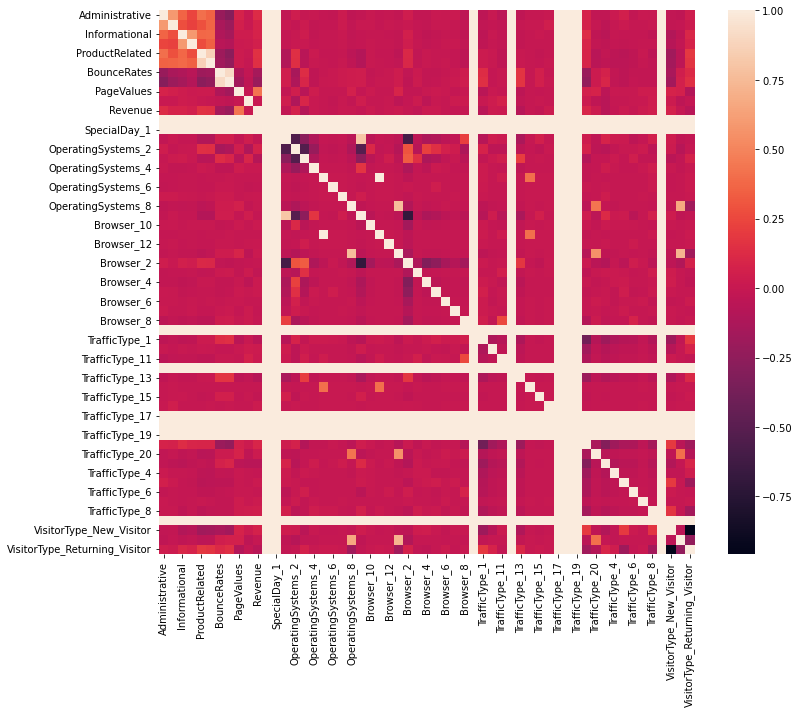

(57, 57)


In [18]:
#Visual inspection of features
plt.figure(figsize=(12,10))
# Compute the Pearson Correlation of each feature in the training df
cor = X_train.corr()
# Replace nan with 1 as it will be removed
cor = cor.fillna(1)
# Plot the correlations
sns.heatmap(cor)
plt.show()
print(cor.shape)